In [436]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [437]:
data1 = pd.read_csv('FOREIGN_DAY_RENT_HIST.csv')

In [496]:
data3 = pd.read_csv('TOTAL_DAY_RENT_HIST.csv')

### 외국인 일별 대여수 데이터 기본 정보

In [439]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52852 entries, 0 to 52851
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       52852 non-null  int64 
 1   f_rent_YMD       52852 non-null  object
 2   f_rent_Y         52852 non-null  int64 
 3   f_rent_M         52852 non-null  int64 
 4   f_rent_D         52852 non-null  int64 
 5   f_rent_weekday   52852 non-null  int64 
 6   f_rent_cnt       52852 non-null  int64 
 7   f_return_cnt     52852 non-null  int64 
 8   f_rent_loc_num   52852 non-null  int64 
 9   f_rent_loc_name  52852 non-null  object
dtypes: int64(8), object(2)
memory usage: 4.0+ MB


In [440]:
data1.describe()[['f_rent_cnt','f_return_cnt']]

,f_rent_cnt,f_return_cnt
count,52852.000000,52852.000000
mean,1.056724,1.045429
std,1.191380,1.197099
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,25.000000,21.000000


In [441]:
data1 = data1.sort_values(by=['f_rent_Y','f_rent_M','f_rent_D'])

In [442]:
# data1 = data1.set_index('f_rent_YMD')
data1['f_rent_YMD'] = data1['f_rent_YMD'].str.replace('-','')
data1 = data1.set_index('f_rent_YMD')

In [443]:
data1

,Unnamed: 0,f_rent_Y,f_rent_M,f_rent_D,f_rent_weekday,f_rent_cnt,f_return_cnt,f_rent_loc_num,f_rent_loc_name
f_rent_YMD,,,,,,,,,
20190101,0,2019,1,1,1,2,0,113,홍대입구역 2번출구 앞
20190101,1,2019,1,1,1,2,0,2505,우성아파트사거리 (기업은행앞)
20190101,2,2019,1,1,1,1,1,2622,올림픽공원역 3번출구
20190101,3,2019,1,1,1,3,2,314,국립현대미술관
20190101,4,2019,1,1,1,0,2,315,신한은행 안국역지점 옆
...,...,...,...,...,...,...,...,...,...
20210131,4577,2021,1,31,6,1,1,4791,명동역9번 출구
20210131,4578,2021,1,31,6,3,3,583,청계천 생태교실 앞
20210131,4579,2021,1,31,6,0,1,2320,도곡역 대치지구대 방향


### 2019-2021.01 외국인 대여수 일별 추이

Text(20191201, 300000, '20191201')

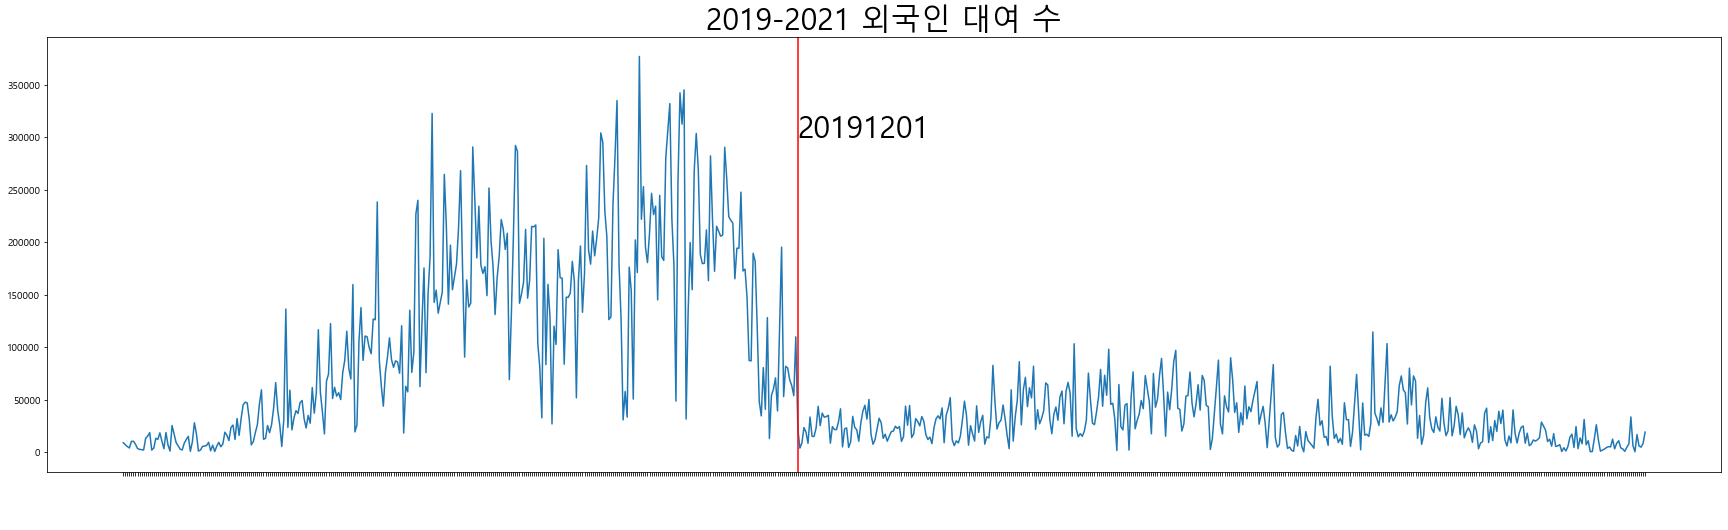

In [444]:
#전체 기간
plt.figure(figsize=(30,8))
plt.title('2019-2021 외국인 대여 수',fontsize=30)
plt.xticks(rotation =90, color='w')
plt.plot(data1.groupby(by='f_rent_YMD').sum()['f_rent_loc_num'].index,data1.groupby(by='f_rent_YMD').sum()['f_rent_loc_num'])
plt.axvline('20191201',color='r')
plt.text('20191201',300000, '20191201',fontsize=30)

In [445]:
# data1.index = data1.index.astype('str')
data1

,Unnamed: 0,f_rent_Y,f_rent_M,f_rent_D,f_rent_weekday,f_rent_cnt,f_return_cnt,f_rent_loc_num,f_rent_loc_name
f_rent_YMD,,,,,,,,,
20190101,0,2019,1,1,1,2,0,113,홍대입구역 2번출구 앞
20190101,1,2019,1,1,1,2,0,2505,우성아파트사거리 (기업은행앞)
20190101,2,2019,1,1,1,1,1,2622,올림픽공원역 3번출구
20190101,3,2019,1,1,1,3,2,314,국립현대미술관
20190101,4,2019,1,1,1,0,2,315,신한은행 안국역지점 옆
...,...,...,...,...,...,...,...,...,...
20210131,4577,2021,1,31,6,1,1,4791,명동역9번 출구
20210131,4578,2021,1,31,6,3,3,583,청계천 생태교실 앞
20210131,4579,2021,1,31,6,0,1,2320,도곡역 대치지구대 방향


In [482]:
corona_after = data1['20191201':]
corona_before = data1[:'20191130']

In [484]:
corona_before

,Unnamed: 0,f_rent_Y,f_rent_M,f_rent_D,f_rent_weekday,f_rent_cnt,f_return_cnt,f_rent_loc_num,f_rent_loc_name
f_rent_YMD,,,,,,,,,
20190101,0,2019,1,1,1,2,0,113,홍대입구역 2번출구 앞
20190101,1,2019,1,1,1,2,0,2505,우성아파트사거리 (기업은행앞)
20190101,2,2019,1,1,1,1,1,2622,올림픽공원역 3번출구
20190101,3,2019,1,1,1,3,2,314,국립현대미술관
20190101,4,2019,1,1,1,0,2,315,신한은행 안국역지점 옆
...,...,...,...,...,...,...,...,...,...
20191130,23407,2019,11,30,5,1,1,811,녹사평역1번출구
20191130,23408,2019,11,30,5,3,1,812,용산전쟁기념관
20191130,23409,2019,11,30,5,1,1,829,베르가모앞


In [485]:
corona_before.groupby('f_rent_M').sum()

,Unnamed: 0,f_rent_Y,f_rent_D,f_rent_weekday,f_rent_cnt,f_return_cnt,f_rent_loc_num
f_rent_M,,,,,,,
1,79401,805581,6481,1273,427,423,274014
2,315315,989310,8313,1348,529,526,338583
3,1689145,2327907,19397,4236,1139,1125,1122950
4,6405399,4197501,34976,6619,2391,2367,2083412
5,18699673,6648567,54976,10697,3659,3628,3300852
6,47265408,11500224,90952,20048,6348,6282,5619462
7,59863341,10914714,78968,15728,5952,5890,5125188
8,76902639,11237754,97132,18916,6026,5948,5613026
9,97232361,11778846,99848,18796,6502,6444,5558726


### 코로나 이전, 이후 외국인 월별 대여건수 

Text(0.5, 1.0, '코로나 이전 월별 대여건수')

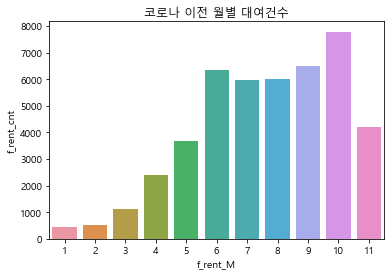

In [486]:
# f = plt.figure(figsize=(400,10))
# f, axes = plt.subplots(1, 2)
# pltfigure(figsize=(40,10))

sns.barplot(x=corona_before.groupby('f_rent_M').sum().index, y='f_rent_cnt', data = corona_before.groupby('f_rent_M').sum())
plt.title('코로나 이전 월별 대여건수')

# ax1 = sns.barplot(x=corona_after.groupby('f_rent_M').sum().index, y='f_rent_cnt', data = corona_after.groupby('f_rent_M').sum(),ax=axes[1])
# ax1.set_title('코로나 이후 월별 대여건수')
# ax1.set(ylim=(0, 8000))

Text(0.5, 1.0, '코로나 이후 외국인 월별 대여건수 총합')

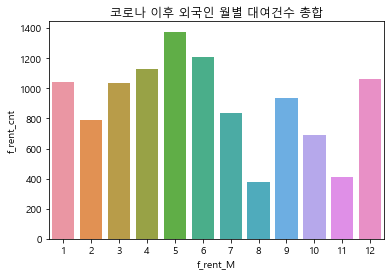

In [487]:
ax = sns.barplot(x=corona_after.groupby('f_rent_M').sum().index, y='f_rent_cnt', data = corona_after.groupby('f_rent_M').sum())
ax.set_title('코로나 이후 외국인 월별 대여건수 총합')
# ax.set(ylim=(0, 8000))

### 서울시 코로나 확진자수 추이와 비교

In [450]:
data2 = pd.read_excel('서울시 코로나19 확진자 현황.xlsx')

In [451]:
data2['확진일'] = data2['확진일'].astype('str')

In [452]:
data2.확진일 = data2.확진일.str.replace('-','')

In [453]:
data2 = pd.DataFrame(data2.확진일.value_counts()).sort_index()

Text(20210105, 500, '2021년')

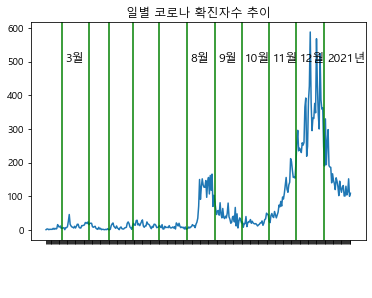

In [454]:
plt.plot(data2[:'20210131'])
plt.xticks(rotation =90, color='w')
plt.title('일별 코로나 확진자수 추이')
plt.text('20200305',500, '3월',fontsize=12)
plt.axvline('20200301',color='g')
plt.axvline('20200401',color='g')
plt.axvline('20200501',color='g')
plt.axvline('20200601',color='g')
plt.axvline('20200701',color='g')
plt.axvline('20200801',color='g')
plt.text('20200805',500, '8월',fontsize=12)
plt.axvline('20200901',color='g')
plt.text('20200905',500, '9월',fontsize=12)
plt.axvline('20201001',color='g')
plt.text('20201005',500, '10월',fontsize=12)
plt.axvline('20201101',color='g')
plt.text('20201105',500, '11월',fontsize=12)
plt.axvline('20201201',color='g')
plt.text('20201205',500, '12월',fontsize=12)
plt.axvline('20210101',color='g')
plt.text('20210105',500, '2021년',fontsize=12)

Text(20210105, 100, '2021년')

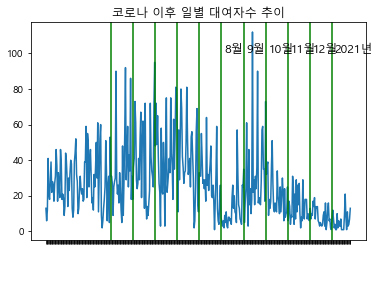

In [488]:
plt.plot(corona_after.groupby(by='f_rent_YMD').sum()['f_rent_cnt'])
plt.xticks(rotation =90, color='w')
plt.title('코로나 이후 일별 대여자수 추이')
# plt.text('20200305',100, '3월',fontsize=12)
plt.axvline('20200301',color='g')
plt.axvline('20200401',color='g')
plt.axvline('20200501',color='g')
plt.axvline('20200601',color='g')
plt.axvline('20200701',color='g')
plt.axvline('20200801',color='g')
plt.text('20200805',100, '8월',fontsize=12)
plt.axvline('20200901',color='g')
plt.text('20200905',100, '9월',fontsize=12)
plt.axvline('20201001',color='g')
plt.text('20201005',100, '10월',fontsize=12)
plt.axvline('20201101',color='g')
plt.text('20201105',100, '11월',fontsize=12)
plt.axvline('20201201',color='g')
plt.text('20201205',100, '12월',fontsize=12)
plt.axvline('20210101',color='g')
plt.text('20210105',100, '2021년',fontsize=12)

### 코로나 이전, 이후 인기 대여소

In [456]:
corona_before.groupby('f_rent_loc_name').sum()[['f_rent_cnt']].sort_values('f_rent_cnt', ascending=False).head(10)

,f_rent_cnt
f_rent_loc_name,
여의나루역 1번출구 앞,1745
홍대입구역 2번출구 앞,832
뚝섬유원지역 1번출구 앞,618
서울숲 관리사무소,607
"고속터미널역 8-1번, 8-2번 출구 사이",512
홍대입구역 8번출구 앞,445
롯데월드타워(잠실역2번출구 쪽),418
동대문역사문화공원역 9번출구 앞,410
현대고등학교 건너편,391


In [457]:
corona_after.groupby('f_rent_loc_name').sum()[['f_rent_cnt']].sort_values('f_rent_cnt', ascending=False).head(10)

,f_rent_cnt
f_rent_loc_name,
여의나루역 1번출구 앞,310
홍대입구역 8번출구 앞,164
뚝섬유원지역 1번출구 앞,145
홍대입구역 2번출구 앞,133
합정역 7번출구 앞,130
현대고등학교 건너편,95
서울숲 관리사무소,91
흑석역 1번출구,85
용산 파크타워 앞,84


=> 서울숲, 롯데월드타워, 동대문역사문화공원역 등 일부 관광지가 순위에서 사라짐

### 코로나 이전, 이후 인기 반납소

In [458]:
corona_before.groupby('f_rent_loc_name').sum()[['f_return_cnt']].sort_values('f_return_cnt', ascending=False).head(10)

,f_return_cnt
f_rent_loc_name,
여의나루역 1번출구 앞,1805
홍대입구역 2번출구 앞,796
"고속터미널역 8-1번, 8-2번 출구 사이",713
뚝섬유원지역 1번출구 앞,604
서울숲 관리사무소,536
홍대입구역 8번출구 앞,491
동대문역사문화공원역 9번출구 앞,479
신세계백화점 본점 앞,458
현대고등학교 건너편,433


In [459]:
corona_after.groupby('f_rent_loc_name').sum()[['f_return_cnt']].sort_values('f_return_cnt', ascending=False).head(10)

,f_return_cnt
f_rent_loc_name,
여의나루역 1번출구 앞,337
뚝섬유원지역 1번출구 앞,183
홍대입구역 8번출구 앞,171
합정역 7번출구 앞,157
현대고등학교 건너편,117
"고속터미널역 8-1번, 8-2번 출구 사이",115
용산 파크타워 앞,106
서울숲 관리사무소,100
홍대입구역 2번출구 앞,97


### 요일별 대여수 비교

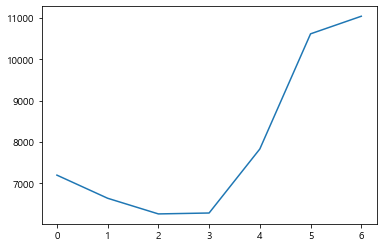

In [523]:
plt.plot(data1.groupby('f_rent_weekday').sum()['f_rent_cnt'])

Text(0.5, 1.0, '전체기간 요일별 외국인 대여수')

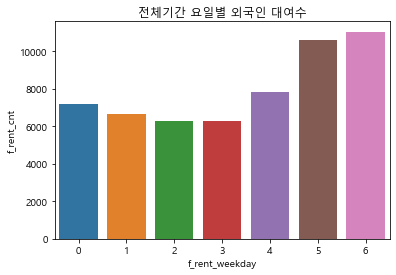

In [489]:
sns.barplot(x=data1.groupby('f_rent_weekday').sum()[['f_rent_cnt']].index, y='f_rent_cnt', data=data1.groupby('f_rent_weekday').sum()[['f_rent_cnt']])
plt.title('전체기간 요일별 외국인 대여수')

Text(0.5, 1.0, '코로나 이전 요일별 외국인 대여수')

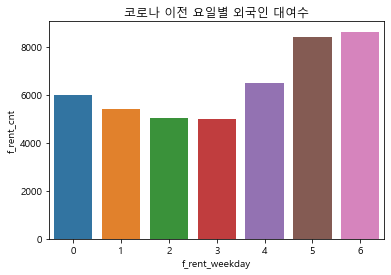

In [494]:
sns.barplot(x=corona_before.groupby('f_rent_weekday').sum()[['f_rent_cnt']].index, y='f_rent_cnt', data=corona_before.groupby('f_rent_weekday').sum()[['f_rent_cnt']])
plt.title('코로나 이전 요일별 외국인 대여수')

Text(0.5, 1.0, '코로나 이후 요일별 외국인 대여수')

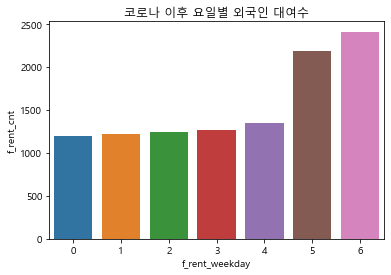

In [495]:
sns.barplot(x=corona_after.groupby('f_rent_weekday').sum()[['f_rent_cnt']].index, y='f_rent_cnt', data=corona_after.groupby('f_rent_weekday').sum()[['f_rent_cnt']])
plt.title('코로나 이후 요일별 외국인 대여수')

### 전체 이용현황 데이터 기본정보

In [498]:
data3

,Unnamed: 0,t_rent_YMD,t_rent_cnt
0,0,2018-01-01,4950
1,1,2018-01-02,7136
2,2,2018-01-03,7156
3,3,2018-01-04,7102
4,4,2018-01-05,7705
...,...,...,...
1269,210,2021-01-27,45639
1270,211,2021-01-28,22745
1271,212,2021-01-29,24435
1272,213,2021-01-30,28379


In [501]:
data3.t_rent_YMD = data3.t_rent_YMD.astype('datetime64')

In [502]:
weekday_list = []
for i in data3.t_rent_YMD:
    weekday_list.append(i.weekday())

In [504]:
data3['weekday'] = weekday_list

In [505]:
data3.t_rent_YMD = data3.t_rent_YMD.astype(str).str.replace('-','')

In [506]:
data3 = data3[['t_rent_YMD','t_rent_cnt','weekday']]
data3 = data3.sort_values(by='t_rent_YMD')

In [465]:
data3 = data3.set_index('t_rent_YMD')

In [466]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 20180101 to 20210131
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   t_rent_cnt  1274 non-null   int64
dtypes: int64(1)
memory usage: 19.9+ KB


In [507]:
data3.describe()

,t_rent_cnt,weekday
count,1274.000000,1274.000000
mean,49971.945840,2.999215
std,29660.093879,2.000196
min,1037.000000,0.000000
25%,25045.000000,1.000000
50%,44347.500000,3.000000
75%,76951.250000,5.000000
max,118921.000000,6.000000


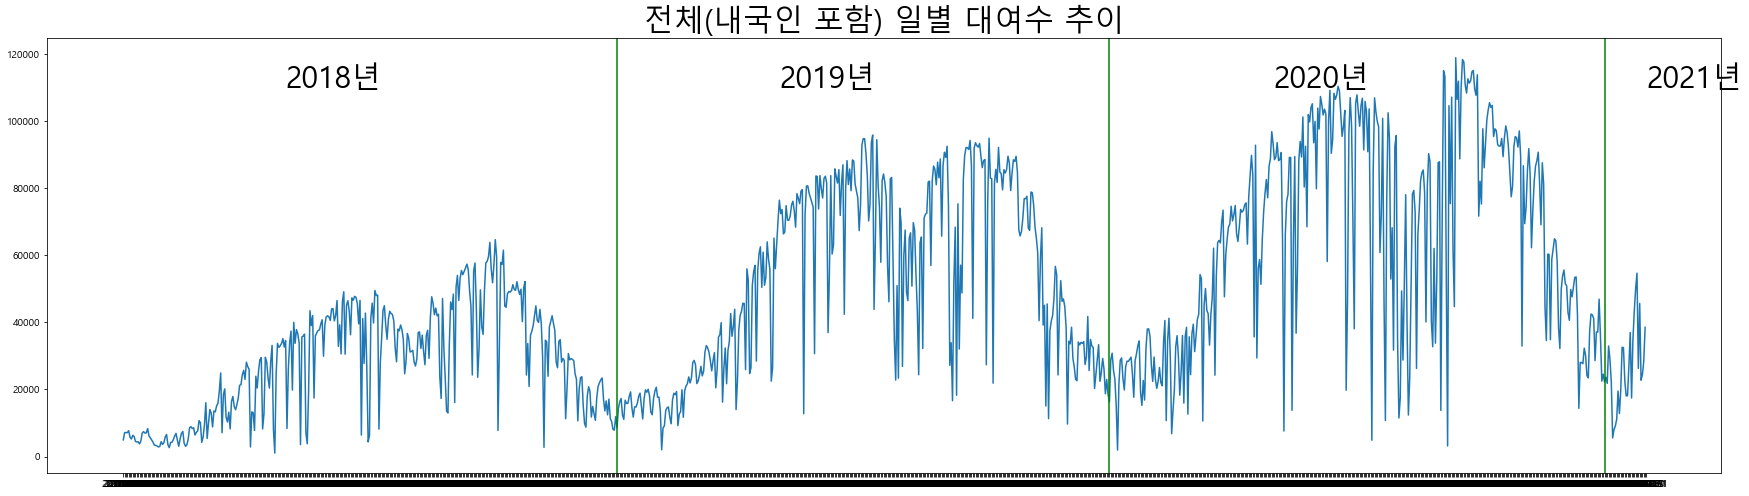

In [468]:
plt.figure(figsize=(30,8))
plt.title('전체(내국인 포함) 일별 대여수 추이',fontsize=30)
plt.plot(data3)
plt.text('20180501',110000, '2018년',fontsize=30)
plt.text('20190501',110000, '2019년',fontsize=30)
plt.axvline('20190101',color='g')
plt.text('20200501',110000, '2020년',fontsize=30)
plt.axvline('20200101',color='g')
plt.text('20210201',110000, '2021년',fontsize=30)
plt.axvline('20210101',color='g')

In [469]:
# ax = sns.barplot(x=corona_after.groupby('f_rent_M').sum().index, y='f_rent_cnt', data = corona_after.groupby('f_rent_M').sum())
# ax.set_title('전체(내국인 포함) 월별 대여건수 총합')

Text(20210105, 500, '2021년')

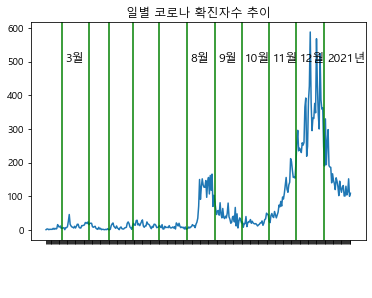

In [470]:
plt.plot(data2[:'20210131'])
plt.xticks(rotation =90, color='w')
plt.title('일별 코로나 확진자수 추이')
plt.text('20200305',500, '3월',fontsize=12)
plt.axvline('20200301',color='g')
plt.axvline('20200401',color='g')
plt.axvline('20200501',color='g')
plt.axvline('20200601',color='g')
plt.axvline('20200701',color='g')
plt.axvline('20200801',color='g')
plt.text('20200805',500, '8월',fontsize=12)
plt.axvline('20200901',color='g')
plt.text('20200905',500, '9월',fontsize=12)
plt.axvline('20201001',color='g')
plt.text('20201005',500, '10월',fontsize=12)
plt.axvline('20201101',color='g')
plt.text('20201105',500, '11월',fontsize=12)
plt.axvline('20201201',color='g')
plt.text('20201205',500, '12월',fontsize=12)
plt.axvline('20210101',color='g')
plt.text('20210105',500, '2021년',fontsize=12)

Text(20210105, 110000, '2021년')

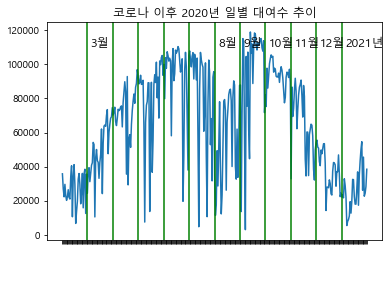

In [492]:
plt.plot(data3['20200131':])
plt.xticks(rotation =90, color='w')
plt.title('코로나 이후 2020년 일별 대여수 추이')
plt.text('20200305',110000, '3월',fontsize=12)
plt.axvline('20200301',color='g')
plt.axvline('20200401',color='g')
plt.axvline('20200501',color='g')
plt.axvline('20200601',color='g')
plt.axvline('20200701',color='g')
plt.axvline('20200801',color='g')
plt.text('20200805',110000, '8월',fontsize=12)
plt.axvline('20200901',color='g')
plt.text('20200905',110000, '9월',fontsize=12)
plt.axvline('20201001',color='g')
plt.text('20201005',110000, '10월',fontsize=12)
plt.axvline('20201101',color='g')
plt.text('20201105',110000, '11월',fontsize=12)
plt.axvline('20201201',color='g')
plt.text('20201205',110000, '12월',fontsize=12)
plt.axvline('20210101',color='g')
plt.text('20210105',110000, '2021년',fontsize=12)

Text(20191205, 90000, '12월')

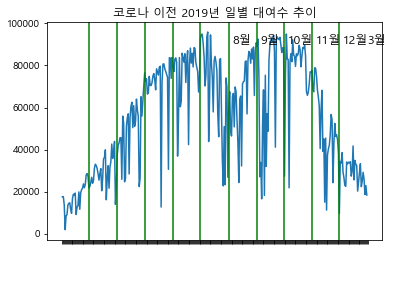

In [493]:
plt.plot(data3['20190131':'20191231'])
plt.xticks(rotation =90, color='w')
plt.title('코로나 이전 2019년 일별 대여수 추이')
plt.text('20200305',90000, '3월',fontsize=12)
plt.axvline('20190301',color='g')
plt.axvline('20190401',color='g')
plt.axvline('20190501',color='g')
plt.axvline('20190601',color='g')
plt.axvline('20190701',color='g')
plt.axvline('20190801',color='g')
plt.text('20190805',90000, '8월',fontsize=12)
plt.axvline('20190901',color='g')
plt.text('20190905',90000, '9월',fontsize=12)
plt.axvline('20191001',color='g')
plt.text('20191005',90000, '10월',fontsize=12)
plt.axvline('20191101',color='g')
plt.text('20191105',90000, '11월',fontsize=12)
plt.axvline('20191201',color='g')
plt.text('20191205',90000, '12월',fontsize=12)

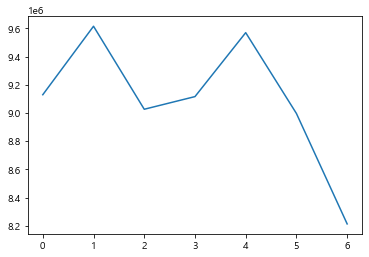

In [514]:
plt.plot(data3.groupby('weekday').sum())

In [516]:
data3= data3.set_index('t_rent_YMD')

In [517]:
corona_after2 = data3['20191201':]
corona_before2 = data3[:'20191130']

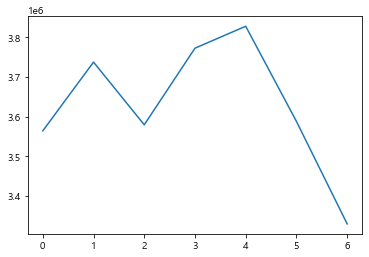

In [518]:
plt.plot(corona_after2.groupby('weekday').sum())

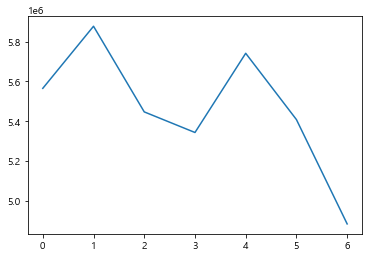

In [519]:
plt.plot(corona_before2.groupby('weekday').sum())